## Luiz Berlandi| Finanças | ETFs 

### Introdução

O objetivo desse projeto é analisar a movimentação dos etfs, buscando classiicar e prever possíveis movimentações futuras.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('1.dataset'):
    for filename in filenames:
        if filename == 'ETF prices.csv':
            csv_file_path = os.path.join(dirname, filename)

df = pd.read_csv(csv_file_path)
df.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df.describe()

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [4]:
df.info

<bound method DataFrame.info of         fund_symbol  price_date   open   high    low  close  adj_close  volume
0               AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1               AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2               AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3               AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4               AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
...             ...         ...    ...    ...    ...    ...        ...     ...
3866025         ZSL  2021-11-23  26.81  27.21  26.30  26.35      26.35  190900
3866026         ZSL  2021-11-24  26.79  26.96  26.57  26.69      26.69  109000
3866027         ZSL  2021-11-26  26.67  28.14  26.67  27.72      27.72  205500
3866028         ZSL  2021-11-29  27.89  28.56  27.80  28.27      28.27  411900
3866029         ZSL  2021-11-30  28.15  28.73  25.91  28.49      28.49  219400

[3866030 rows x 8 c

In [5]:
distinct_values = df['fund_symbol'].value_counts()
print(distinct_values)

fund_symbol
SPY     7263
EWA     6472
EWD     6472
EWC     6472
DIA     6007
        ... 
BKCH      98
HVAL      95
VSPY      94
LOPX      92
JIDA      89
Name: count, Length: 2310, dtype: int64


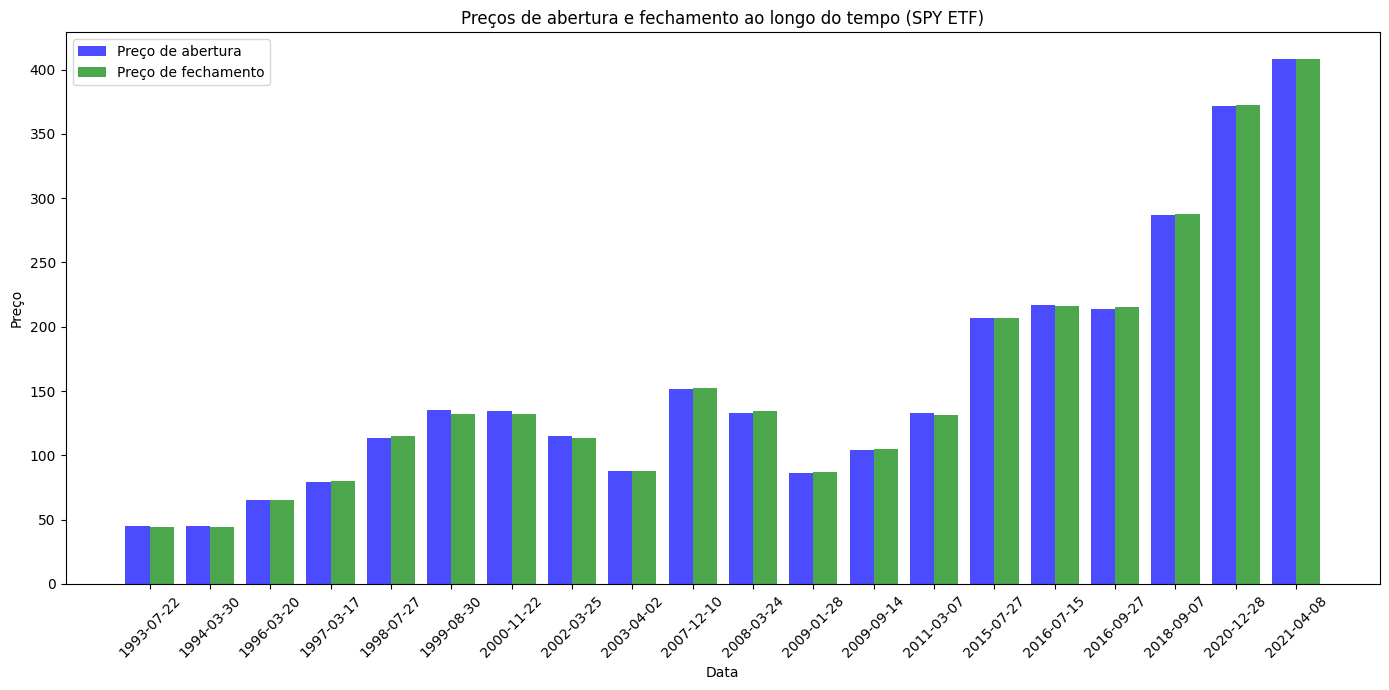

In [6]:
df['price_date'] = pd.to_datetime(df['price_date'])

spy_df = df[df['fund_symbol'] == 'SPY']

sample_spy_df = spy_df.sample(n=20, random_state=12)

sample_spy_df = sample_spy_df.sort_values(by='price_date')
bar_width = 0.4

x = range(len(sample_spy_df))

plt.figure(figsize=(14, 7))

plt.bar(x, sample_spy_df['open'], width=bar_width, label='Preço de abertura', color='blue', alpha=0.7)

plt.bar([p + bar_width for p in x], sample_spy_df['close'], width=bar_width, label='Preço de fechamento', color='green', alpha=0.7)

plt.title('Preços de abertura e fechamento ao longo do tempo (SPY ETF)')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.xticks([p + bar_width / 2 for p in x], sample_spy_df['price_date'].dt.date, rotation=45)

plt.legend()

plt.tight_layout()

plt.show()


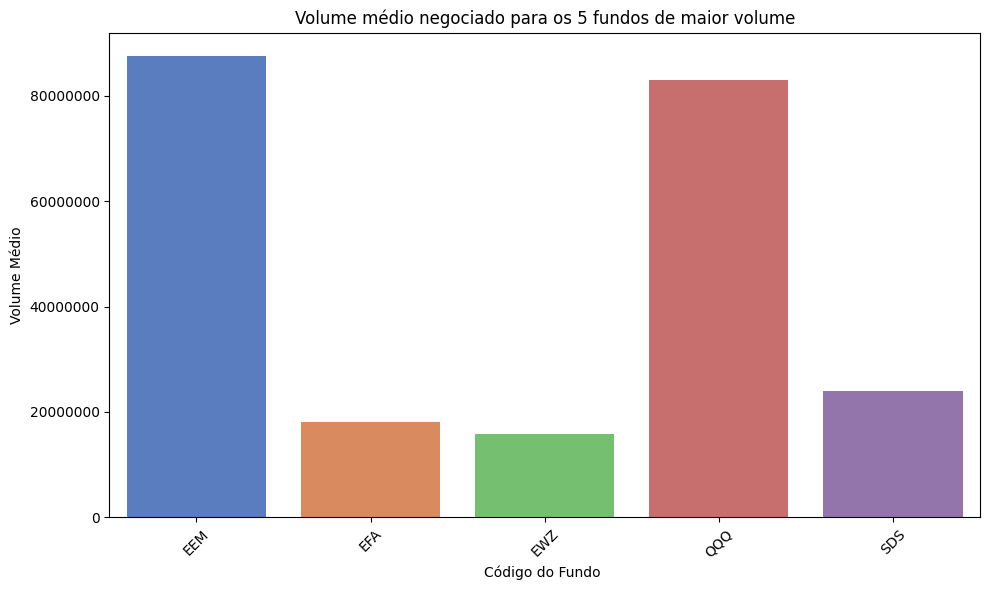

In [7]:
sample_df = df.sample(n=1000, random_state=12)
top_fund_symbols = sample_df.groupby('fund_symbol')['volume'].sum().nlargest(5).index

filtered_df = sample_df[sample_df['fund_symbol'].isin(top_fund_symbols)]

avg_volume_per_fund = filtered_df.groupby('fund_symbol')['volume'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='fund_symbol', y='volume', data=avg_volume_per_fund, palette='muted', hue='fund_symbol')

plt.title('Volume médio negociado para os 5 fundos de maior volume')
plt.xlabel('Código do Fundo ')
plt.ylabel('Volume Médio')
plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()



In [8]:
df = df.drop_duplicates()
df = df.dropna()
etf_counts = df['fund_symbol'].value_counts()
valid_etfs = etf_counts[etf_counts >= 99].index
df = df[df['fund_symbol'].isin(valid_etfs)]
df.head(10)

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
5,AAA,2020-09-16,24.97,24.98,24.97,24.97,24.75,14100
6,AAA,2020-09-17,24.99,25.00,24.98,24.98,24.76,15200
7,AAA,2020-09-18,24.97,24.98,24.97,24.98,24.76,5300
8,AAA,2020-09-21,24.99,24.99,24.98,24.98,24.76,8600
9,AAA,2020-09-22,24.98,24.99,24.98,24.98,24.76,8100


In [9]:
null_values_open = df['open'].isnull().sum()
null_values_close = df['close'].isnull().sum()

zero_values_open = (df['open'] == 0).sum()
zero_values_close = (df['close'] == 0).sum()

print(f"Número de valores nulos ou NaN em 'open': {null_values_open}")
print(f"Número de valores nulos ou NaN em 'close': {null_values_close}")
print(f"Número de valores zero em 'open': {zero_values_open}")
print(f"Número de valores zero em 'close': {zero_values_close}")

Número de valores nulos ou NaN em 'open': 0
Número de valores nulos ou NaN em 'close': 0
Número de valores zero em 'open': 8
Número de valores zero em 'close': 8


In [10]:
zero_open_df = df[df['open'] == 0]
zero_close_df = df[df['close'] == 0]

print("Linhas onde 'open' é 0:")
print(zero_open_df)

print("\nLinhas onde 'close' é 0:")
print(zero_close_df)

Linhas onde 'open' é 0:
        fund_symbol price_date  open  high  low  close  adj_close  volume
1142682        FLQL 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1143800        FLQM 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1144918        FLQS 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1388072        GIGB 2017-07-03   0.0   0.0  0.0    0.0        0.0       0
2105283        JPST 2017-06-23   0.0   0.0  0.0    0.0        0.0       0
3425630        TUSA 2014-12-23   0.0   0.0  0.0    0.0        0.0       0
3564346        USOI 2017-06-19   0.0   0.0  0.0    0.0        0.0       0
3689801        VSDA 2017-06-13   0.0   0.0  0.0    0.0        0.0       0

Linhas onde 'close' é 0:
        fund_symbol price_date  open  high  low  close  adj_close  volume
1142682        FLQL 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1143800        FLQM 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1144918        FLQS 2017-06-20   0.0   0.0  0.0    0.0        

In [11]:
df = df[(df['open'] != 0) & (df['close'] != 0)]

In [12]:
df['lag_open'] = df.groupby('fund_symbol')['open'].shift(1)
df['lag_close'] = df.groupby('fund_symbol')['close'].shift(1)
df = df.dropna()
df.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume,lag_open,lag_close
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500,25.10,25.07
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400,25.06,25.07
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100,25.04,25.03
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100,25.01,25.02
5,AAA,2020-09-16,24.97,24.98,24.97,24.97,24.75,14100,25.02,25.01


In [13]:
predictions = []
etfs = df['fund_symbol'].unique()

In [ ]:
for etf in etfs:
    etf_data = df[df['fund_symbol'] == etf].copy()

    X = etf_data[['lag_open', 'lag_close']]
    y_open = etf_data['open']
    y_close = etf_data['close']

    X_train, X_test, y_train_open, y_test_open, y_train_close, y_test_close = train_test_split(
        X, y_open, y_close, test_size=0.2, shuffle=False
    )

    model_open = LinearRegression()
    model_open.fit(X_train, y_train_open)

    model_close = LinearRegression()
    model_close.fit(X_train, y_train_close)

    y_pred_open = model_open.predict(X_test)
    y_pred_close = model_close.predict(X_test)

    mae_open = mean_absolute_error(y_test_open, y_pred_open)
    r2_open = r2_score(y_test_open, y_pred_open)
    
    mae_close = mean_absolute_error(y_test_close, y_pred_close)
    r2_close = r2_score(y_test_close, y_pred_close)

    last_row = etf_data.tail(1)[['lag_open', 'lag_close']]
    pred_open = model_open.predict(last_row)
    pred_close = model_close.predict(last_row)
  
    predictions.append({
        'fund_symbol': etf,
        'pred_open': pred_open[0],
        'pred_close': pred_close[0],
        'mae_open': mae_open,
        'r2_open': r2_open,
        'mae_close': mae_close,
        'r2_close': r2_close
    })

predictions_df = pd.DataFrame(predictions)
predictions_df.head()

In [ ]:
etf_symbol = 'QQQ' 
etf_data = df[df['fund_symbol'] == etf_symbol]

random_samples = etf_data.sample(n=15, random_state=42)

X_test = random_samples[['lag_open', 'lag_close']]
y_test_open = random_samples['open']
y_test_close = random_samples['close']

y_pred_open = model_open.predict(X_test)
y_pred_close = model_close.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_open.values, label='Preço de abertura atual', marker='o')
plt.plot(y_pred_open, label='Preço de abertura previsto', linestyle='--', marker='x')
plt.title(f'Open Price Prediction for {etf_symbol} ETF')
plt.xlabel('Índice simples')
plt.ylabel('Preço')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_close.values, label='Preço de fechamento atual', marker='o')
plt.plot(y_pred_close, label='Preço de fechamento previsto', linestyle='--', marker='x')
plt.title(f'Close Price Prediction for {etf_symbol} ETF')
plt.xlabel('Índice simples')
plt.ylabel('Preço')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
etf_symbol = 'SPY' 
etf_data = df[df['fund_symbol'] == etf_symbol]

random_samples = etf_data.sample(n=15, random_state=42)

X_test = random_samples[['lag_open', 'lag_close']]
y_test_open = random_samples['open']
y_test_close = random_samples['close']

y_pred_open = model_open.predict(X_test)
y_pred_close = model_close.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_open.values, label='Preço Real de Abertura', marker='o')
plt.plot(y_pred_open, label='Preço Previsto de Abertura', linestyle='--', marker='x')
plt.title(f'Previsão de Preço de Abertura para o ETF {etf_symbol}')
plt.xlabel('Índice da Amostra')
plt.ylabel('Preço')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_close.values, label='Preço Real de Fechamento', marker='o')
plt.plot(y_pred_close, label='Preço Previsto de Fechamento', linestyle='--', marker='x')
plt.title(f'Previsão de Preço de Fechamento para o ETF {etf_symbol}')
plt.xlabel('Índice da Amostra')
plt.ylabel('Preço')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions_df['price_change'] = predictions_df['pred_close'] - predictions_df['pred_open']
predictions_df['return_percentage'] = (predictions_df['price_change'] / predictions_df['pred_open']) * 100
predictions_df.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['return_percentage'], bins=20, kde=True)
plt.title('Distribution of ETF Return Percentages')
plt.xlabel('Return Percentage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
predictions_df['category'] = np.where(predictions_df['return_percentage'] < 0, 'Loss', None)
non_negative = predictions_df[predictions_df['return_percentage'] >= 0]
non_negative['category'] = pd.qcut(non_negative['return_percentage'], q=3, labels=['Low', 'Medium', 'High'])
predictions_df.update(non_negative)

predictions_df.head()

In [ ]:
predictions_df.count

In [ ]:
X = predictions_df[['price_change', 'return_percentage']]
y = predictions_df['category']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

predictions_df['predicted_category'] = clf.predict(X)

print(classification_report(y, predictions_df['predicted_category']))

classified_df = predictions_df.copy()

print(classified_df.head())

In [ ]:
# Matriz de Confusão: Real vs Previsto
conf_matrix = confusion_matrix(y, predictions_df['predicted_category'])

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matriz de Confusão: Real vs Previsto')
plt.xlabel('Categoria Prevista')
plt.ylabel('Categoria Real')
plt.show()

In [ ]:
x=[1,2,3,4]
y=[4,5,6,7]

plt.plot(x,y)

plt.title('Gráfico de Linha Simples')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.show()